In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1")

In [3]:
df = df_raw[["main_category", "categories", "it_location", "price"]].copy()
df # ograniczamy się do tego podzbioru

,main_category,categories,it_location,price
0,Komputery,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",Warszawa,59.99
1,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",Warszawa,4.90
2,Dom i Ogród,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",Leszno,109.90
3,Książki i Komiksy,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",Wola Krzysztoporska,18.50
4,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",BIAŁYSTOK,19.90
...,...,...,...,...
420015,RTV i AGD,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",Kraśnik,180.00
420016,Uroda,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",Dzierżoniów,14.99
420017,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",Supraśl,5.99
420018,Dla Dzieci,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",Poznań,200.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   main_category  420020 non-null  object 
 1   categories     420020 non-null  object 
 2   it_location    420020 non-null  object 
 3   price          420020 non-null  float64
dtypes: float64(1), object(3)
memory usage: 12.8+ MB


# Preprocessing

## Czyszczenie

In [5]:
df["it_location"] = df["it_location"].apply(lambda x: x.lower())

In [6]:
minor_cats: {str:int} = {}

def extract(data: str):
    cats = eval(data) # próbowałem jsonem, nie dało się w łatwy sposób
    for cat in cats:
        if cat in minor_cats:
            minor_cats[cat] +=1
        else:
            minor_cats[cat] = 1

df["categories"].apply(extract)
len(minor_cats.keys())

6761

In [7]:
aaa = list(minor_cats.values())
aaa.sort(reverse=True)
aaa = aaa[:25] # 25 najliczniejszych

for el in aaa: 
    for k, v in minor_cats.items():
        if el == v:
            print(k, v)

Dom i Ogród 91042
Odzież, Obuwie, Dodatki 54257
Pozostałe 47724
Motoryzacja 45945
Dla Dzieci 42107
Ogród 37009
Uroda 28096
Sport i Turystyka 27532
Obuwie 23951
RTV i AGD 20341
Części samochodowe 20325
Wyposażenie 20305
Rośliny 19896
Telefony i Akcesoria 19805
Akcesoria GSM 15602
Komputery 14571
Odzież damska 13499
Zdrowie 13166
Sportowe 12142
Damskie 12058
Książki i Komiksy 11572
Budownictwo i Akcesoria 10362
Odzież 10163
Części motocyklowe 10098
Kosmetyki pielęgnacyjne 9938


Wypadałoby to posprzątać, żeby mieć kodowanie OneHot dla każdej (lub wybranych) z pomniejszej kategorii, a dopiero później skorzystać z TargetEncoding. (przynajmniej tak mi się wydaje, że byłoby najlepiej)

To chyba wykracza poza zakres zadania.
Zwłaszcza, że otrzymana macierz byłaby wielka i pewnie wypadałoby skorzystać z jakiejś macierzy rzadkiej.

## Kodowanie

In [8]:
from category_encoders.target_encoder import TargetEncoder

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # pandas coś deprecatowało, a ja mam stare biblioteki

In [10]:
def lazy_train_test_split(df_, seed=1382, size=0.2):
    from sklearn.model_selection import train_test_split
    
    return train_test_split(df_.iloc[:, :-1], df_.iloc[:, -1], random_state=seed, test_size=size)

In [11]:
X_train, X_test, y_train, y_test = lazy_train_test_split(df)
X_train

,main_category,categories,it_location
205117,Sport i Turystyka,"['Sport i Turystyka', 'Kolekcje', 'Naklejki (v...",sosnowiec
153506,Telefony i Akcesoria,"['Telefony i Akcesoria', 'Telefony komórkowe',...",tychy
30705,Dom i Ogród,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",tarnowskie góry
303895,Dom i Ogród,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Nasiona',...",pabianice
148332,Telefony i Akcesoria,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Pok...",koszalin
...,...,...,...
253006,Komputery,"['Komputery', 'Urządzenia wskazujące', 'Pady, ...",tarnowskie góry
136648,RTV i AGD,"['RTV i AGD', 'Zasilanie', 'Baterie specjalist...",bydgoszcz
393030,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Odzież damska', '...",warszawa
417179,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Obuwie', 'Męskie'...",swidnik


In [12]:
te1_test= TargetEncoder()
te1_test.fit_transform(X_test, y_test).head()

,main_category,categories,it_location
380433,72.146263,5.156760,4.296046
140381,42.257332,21.098974,89.134020
48754,72.146263,35.510822,88.532352
332384,122.591535,36.032143,54.005581
327511,77.172536,32.222653,78.651054


In [14]:
te3_test= TargetEncoder(smoothing=1000000)
te3_test.fit_transform(X_test, y_test).head()

,main_category,categories,it_location
380433,74.269836,40.784944,40.357086
140381,59.332717,48.765076,82.783445
48754,74.269836,55.970789,82.498828
332384,99.545855,56.231631,65.217223
327511,76.803128,54.324744,77.541846


In [15]:
y_test.mean()

76.43222941764678

Parametr `smoothing` kontroluje "wygładzanie" średniej po kategoriach poprzez branie pod uwagę średniej z całego `y`.
Większy parametr powoduje, że wszystkie zakodowane kategorie są bliższe ogólnej średniej, przez co unikamy overfittingu.
Ma to duży wpływ na kategorie o małych licznościach, które mogą być anomalią.

W naszym zbiorze cecha `categories` może być podatna na overfitting z tego powodu, więc skorzystam z `smoothing=100_000`.

In [48]:
# dzielę na nowo
GLOBAL_SETS = lazy_train_test_split(df)
X_train, X_test, y_train, y_test = GLOBAL_SETS

smoothing = 1e5

te_train = TargetEncoder(smoothing=smoothing)
X_train_te = te_train.fit_transform(X_train, y_train)

te_test = TargetEncoder(smoothing=smoothing)
X_test_te = te_test.fit_transform(X_test, y_test)

GLOBAL_SETS_ENC = (X_train_te, X_test_te, y_train, y_test)

# Modele
## Regresja liniowa

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(X_train_te, y_train)

In [69]:
def print_reg_scores(model, sets=GLOBAL_SETS_ENC, ret=False, print_results=True):
    from sklearn.metrics import r2_score, mean_squared_error
    
    X_train_, X_test_, y_train_, y_test_  = sets
    
    r2 = r2_score(y_test_, model.predict(X_test_))
    rmse = mean_squared_error(y_test_, model.predict(X_test_), squared=False)
    if print_results:
        print(f"R2: {r2:.4f}")
        print(f"RMSE: {rmse:.4f}")
    
    if ret:
        return r2, rmse
print_reg_scores(lr)

R2: 0.1719
RMSE: 308.8626


## Więcej modeli
Wytrenuję kilka modeli na różnych danych z preprocessingu ze zmienionym parametrem `smoothing`, oraz porównam LinearRegression, RidgeRegression i LassoRegression.

In [85]:
def test_smoothing(smoothing_value, ret=False, model_constructor=None, sets=GLOBAL_SETS, print_results=True):
    XTRAIN, XTEST, y_train_, y_test_ = sets

    te_train_ = TargetEncoder(smoothing=smoothing_value)
    XTRAIN2 = te_train_.fit_transform(XTRAIN, y_train_)

    te_test_ = TargetEncoder(smoothing=smoothing_value)
    XTEST2 = te_test_.fit_transform(XTEST, y_test_)
    
    local_model = model_constructor()
    local_model = local_model.fit(XTRAIN2, y_train_)
    #print(local_model)

    if print_results:
        print(f"Smoothing value = {smoothing_value:.0e}")
    t = print_reg_scores(local_model, ret=ret, sets=(XTRAIN2, XTEST2, y_train_, y_test_), print_results=print_results)
    if print_results:
        print("")
    if ret:
        return t

def rate_regressor(model, values = [1e-2, 1e-1, 1e1, 1e2, 1e3, 1e4], print_results=True):
    r2_list = []
    rmse_list = []
    print(model)
    for i in values:
        r2, rmse = test_smoothing(i, ret=True, model_constructor=model, print_results=print_results)
        r2_list.append(r2)
        rmse_list.append(rmse)
    return pd.DataFrame({"smoothing": list(map(lambda x: f"{x:.1e}", values)), "r2_score": r2_list, "rms_error": rmse_list})

In [86]:
lr_results = rate_regressor(LinearRegression)

<class 'sklearn.linear_model._base.LinearRegression'>
Smoothing value = 1e-02
R2: 0.1719
RMSE: 308.8590

Smoothing value = 1e-01
R2: 0.1719
RMSE: 308.8591

Smoothing value = 1e+01
R2: 0.1574
RMSE: 311.5570

Smoothing value = 1e+02
R2: 0.1603
RMSE: 311.0082

Smoothing value = 1e+03
R2: 0.1709
RMSE: 309.0446

Smoothing value = 1e+04
R2: 0.1719
RMSE: 308.8568



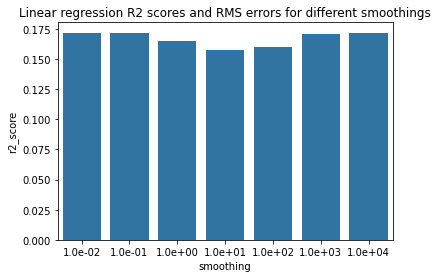

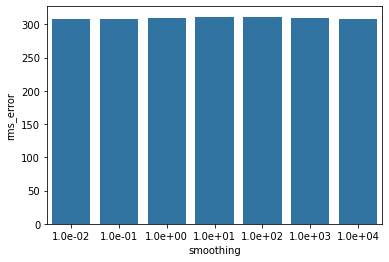

In [77]:
sns.barplot(data=lr_results, x="smoothing", y="r2_score", color="C0")
plt.title("Linear regression R2 scores and RMS errors for different smoothings")
plt.show()
sns.barplot(data=lr_results, x="smoothing", y="rms_error", color="C0")
plt.show()

In [78]:
from sklearn.linear_model import Ridge

rr_results = rate_regressor(Ridge, print_results=False)

<class 'sklearn.linear_model._ridge.Ridge'>


In [81]:
from sklearn.linear_model import Lasso

la_results = rate_regressor(Lasso, print_results=False)

<class 'sklearn.linear_model._coordinate_descent.Lasso'>


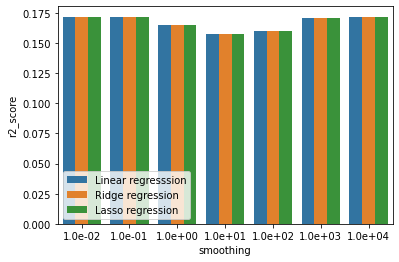

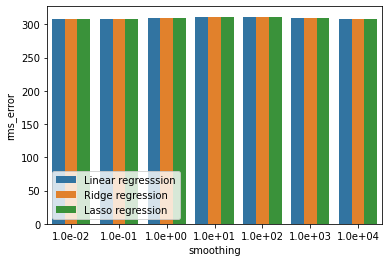

In [80]:
lr_results["model"] = "Linear regresssion"
rr_results["model"] = "Ridge regression"
la_results["model"] = "Lasso regression"

all_results = lr_results.append(rr_results)
all_results = all_results.append(la_results)

sns.barplot(data=all_results, x="smoothing", y="r2_score", hue="model")
plt.legend(loc=3)
plt.show()
sns.barplot(data=all_results, x="smoothing", y="rms_error", hue="model")
plt.legend(loc=3)

plt.show()

Nie ma różnicy, być może coś popsułem...

In [82]:
all_results[all_results["smoothing"] == "1.0e+03"]

,smoothing,r2_score,rms_error,model
5,1.0e+03,0.170914,309.044556,Linear regresssion
5,1.0e+03,0.170914,309.044556,Ridge regression
5,1.0e+03,0.170918,309.043711,Lasso regression


# Drzewo time
Jeszcze nie korzystałem z drzew do regresji i jestem ciekawy jak wyglądają wyniki.

In [61]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr = dtr.fit(X_train_te, y_train)

In [62]:
print_reg_scores(dtr)

R2: 0.0252
RMSE: 335.1068


No wybitne nie jest, ale bardzo się przeuczyło.

In [63]:
dtr.get_depth()

51

In [64]:
from sklearn.model_selection import GridSearchCV

gsdtr = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [i for i in range(1, 20)]
    },
    cv=5
)

gsdtr.fit(X_train_te, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]})

In [65]:
gsdtr.best_estimator_

DecisionTreeRegressor(max_depth=2)

In [66]:
print_reg_scores(gsdtr.best_estimator_)

R2: 0.0948
RMSE: 322.9205


Chyba to nie jest najlepsze podejście dla zadań regresji.